# 1. Generate summary statistics (mean, median, std, etc.).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
mode_values = df.mode().iloc[0]
print(mode_values)

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object


# 2. Create histograms and boxplots for numeric features.

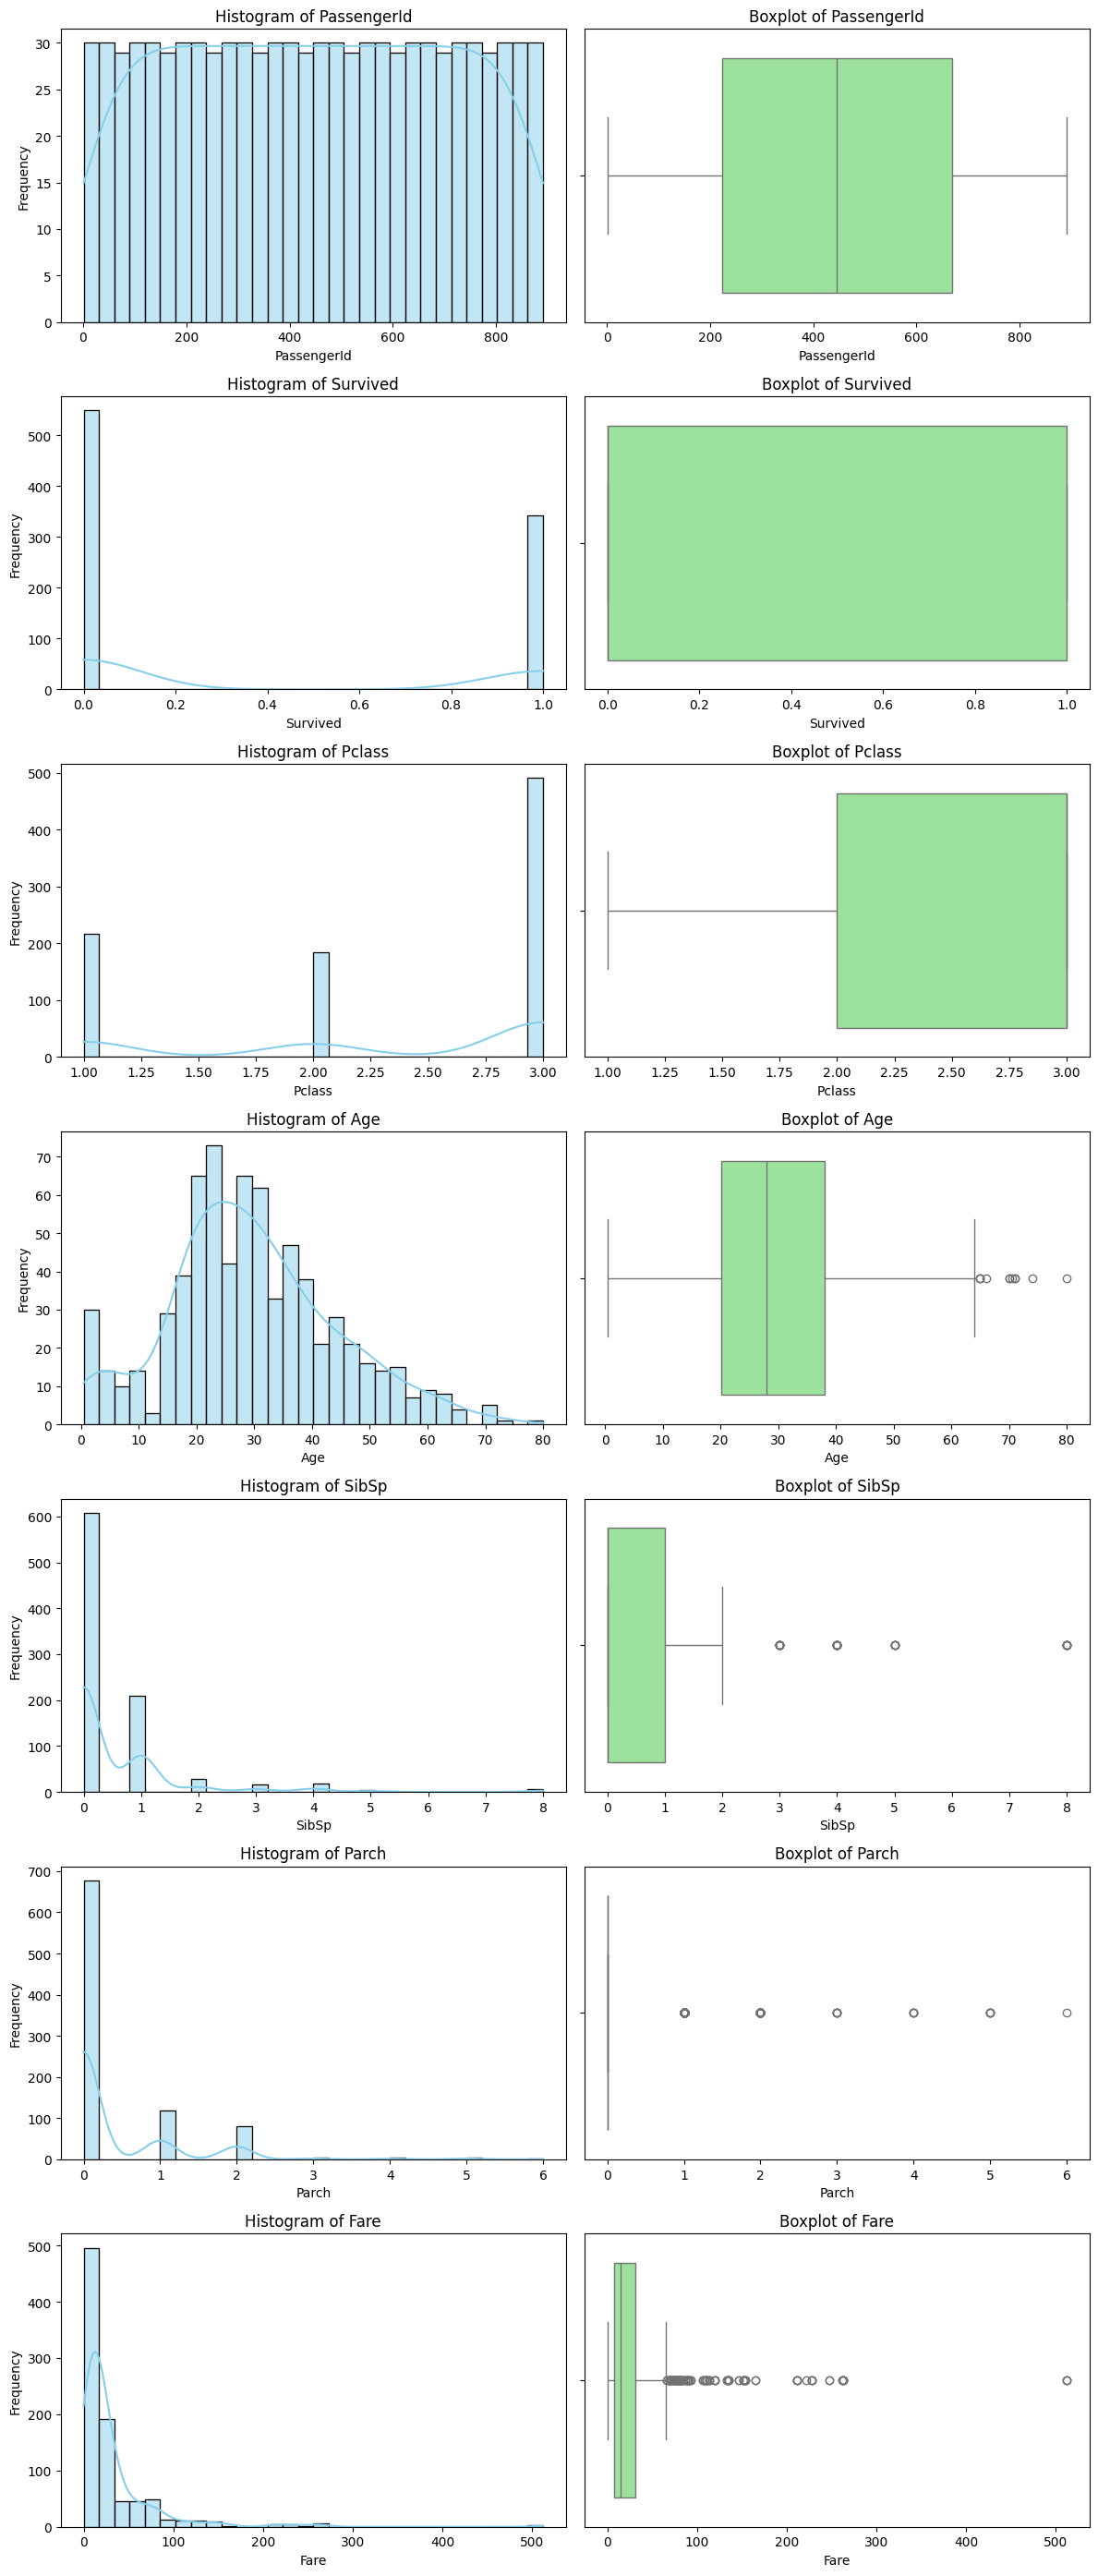

In [11]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12, len(numeric_df.columns) * 4))
for i, column in enumerate(numeric_df.columns):
    plt.subplot(len(numeric_df.columns), 2, 2*i + 1)
    sns.histplot(numeric_df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.subplot(len(numeric_df.columns), 2, 2*i + 2)
    sns.boxplot(x=numeric_df[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.savefig("titanic_numeric_plots.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Use pairplot/correlation matrix for feature relationships.

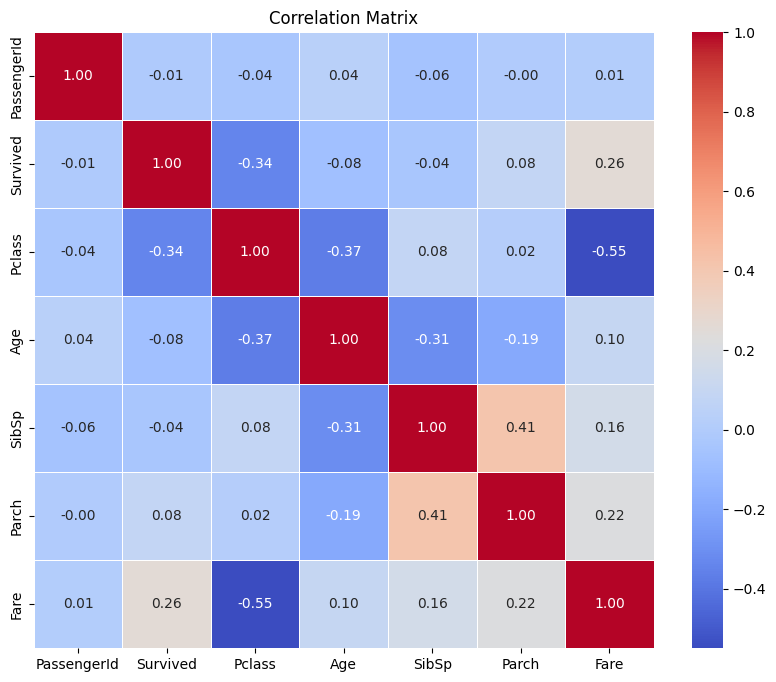

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

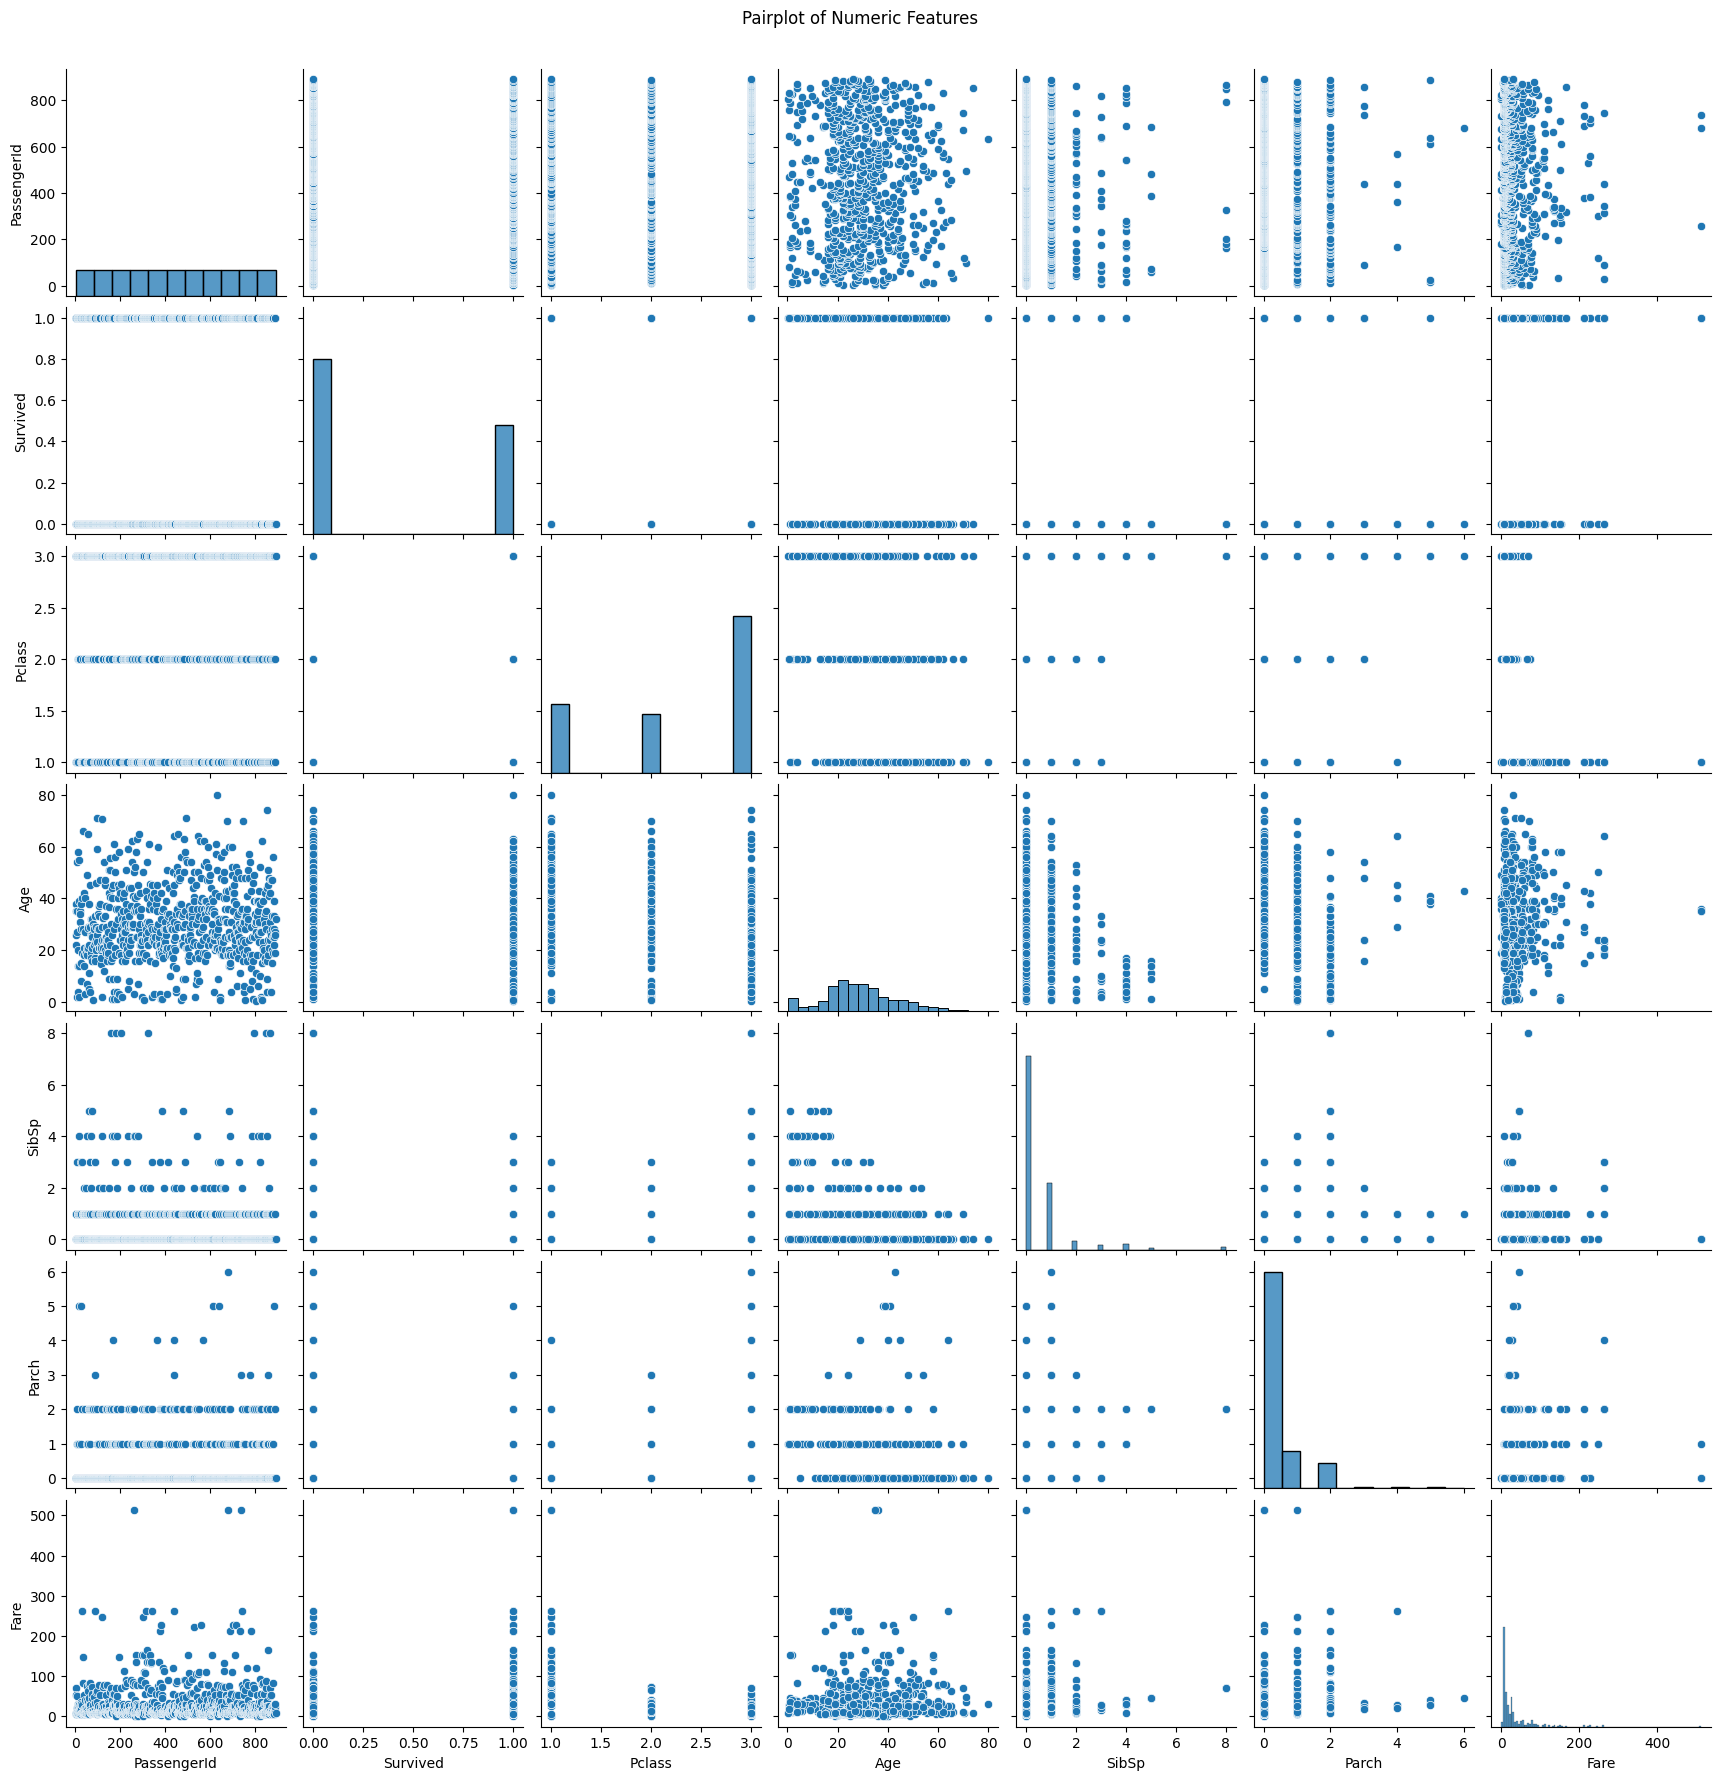

In [13]:
sns.pairplot(numeric_df)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.savefig("pairplots.png", dpi=300, bbox_inches='tight')
plt.show()